In [1]:
import json
import numpy as np
import cv2
import pandas as pd

In [2]:
# Opening JSON file 
json_Jash = open('VAN0008Jash.json') 
json_Leah = open('VAN0008Leah.json') 


In [3]:
# returns JSON object as  
# a dictionary 
data_Jash = json.load(json_Jash) 
data_Leah = json.load(json_Leah) 

In [4]:
list_of_coordinates_Jash=[]
list_of_coordinates_Leah=[]

In [5]:
for i in data_Jash:
#     print(i['geometry']['coordinates'])
    list_of_coordinates_Jash.extend(i['geometry']['coordinates'])
    
    
for i in data_Leah:
#     print(i['geometry']['coordinates'])
    list_of_coordinates_Leah.extend(i['geometry']['coordinates'])

In [6]:
my_img = cv2.imread('VAN0008j.jpg')

In [7]:
my_img.shape

(13390, 16110, 3)

In [8]:
S_img=np.zeros(my_img.shape[:2])
Y_img=np.zeros(my_img.shape[:2])
J_img=np.zeros(my_img.shape[:2])
L_img=np.zeros(my_img.shape[:2])

In [9]:
from matplotlib import pyplot as plt

In [10]:
# plt.imshow(my_img)

In [11]:
for i in list_of_coordinates_Jash:
    pts_Jash = np.array(i, np.int32)
    pts_Jash = pts_Jash.reshape((-1,1,2))
#     cv2.polylines(my_img,[pts_Jash],True,(255,0,0),5)
    cv2.fillPoly(J_img,[pts_Jash],1)

In [12]:
# plt.imshow(J_img)

In [13]:
# cv2.imwrite('Jashjeet.jpg',my_img)

In [14]:
# my_img_Leah = cv2.imread('VAN0008j.jpg')

In [15]:
for i in list_of_coordinates_Leah:
    pts_Leah = np.array(i, np.int32)
    pts_Leah = pts_Leah.reshape((-1,1,2))
#     cv2.polylines(my_img,[pts_Leah],True,(0,43,255),5)
#     cv2.polylines(my_img_Leah,[pts_Leah],True,(0,43,255),5)
    cv2.fillPoly(L_img,[pts_Leah],1)

In [16]:
# plt.imshow(L_img)

In [17]:
# cv2.imwrite('Leah.jpg',my_img_Leah)

In [18]:
# cv2.imwrite('ff.jpg',my_img)

In [19]:
from read_roi import read_roi_file
from read_roi import read_roi_zip
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image, ImageDraw

In [20]:
# to handle decompression bomb
Image.MAX_IMAGE_PIXELS = None

In [21]:
#reading roi files

rois_Sumeet = read_roi_zip("VAN0008Sumeet.zip")

rois_Yash = read_roi_zip("VAN0008Yash.zip")

In [22]:
S_pil = Image.fromarray(S_img)
Y_pil = Image.fromarray(Y_img)


im_pil = Image.fromarray(my_img)
draw = ImageDraw.Draw(im_pil)
draw = ImageDraw.Draw(im_pil)

In [23]:
# im_Sumeet = Image.open("VAN0008j.jpg")
draw_Sumeet=ImageDraw.Draw(S_pil)

# im_Yash = Image.open("VAN0008j.jpg")
draw_Yash=ImageDraw.Draw(Y_pil)

In [24]:
for key in rois_Sumeet.keys():
    left = rois_Sumeet[key]['left']
    top = rois_Sumeet[key]['top']
    width = rois_Sumeet[key]['width']
    height = rois_Sumeet[key]['height']
    
    centreX = int(left + (width/2))
    centreY = int(top + (height/2))
    widthX = int(width/2)
    heightY = int(height/2) 
    
    bbox = (centreX-widthX,centreY-heightY,centreX+widthX,centreY+heightY)
#     draw.ellipse(bbox, outline = "pink", width = 20)
    draw_Sumeet.ellipse(bbox, fill='white')    

In [25]:
# plt.imshow(im_pil)
# plt.imshow(S_pil)

In [26]:
np.unique(S_pil)

array([  0., 255.], dtype=float32)

In [27]:
S_img=np.array(S_pil)

In [28]:
S_img[S_img==255]=1

In [29]:
np.unique(S_img)

array([0., 1.], dtype=float32)

In [30]:
# draw = ImageDraw.Draw(im_pil)

In [31]:
for key in rois_Yash.keys():
    left = rois_Yash[key]['left']
    top = rois_Yash[key]['top']
    width = rois_Yash[key]['width']
    height = rois_Yash[key]['height']
    
    centreX = int(left + (width/2))
    centreY = int(top + (height/2))
    widthX = int(width/2)
    heightY = int(height/2) 
    
    bbox = (centreX-widthX,centreY-heightY,centreX+widthX,centreY+heightY)
#     draw.ellipse(bbox, outline = "green", width = 5)
    draw_Yash.ellipse(bbox, fill='white')

In [32]:
# plt.imshow(im_Yash)
# plt.imshow(Y_pil)

In [33]:
# im_Yash.save("Yash.jpg")

In [34]:
# im_pil.save("VAN0008_output.jpg")

In [35]:
Y_img=np.array(Y_pil)

In [36]:
np.unique(Y_pil)

array([  0., 255.], dtype=float32)

In [37]:
Y_img=np.array(Y_pil)

In [38]:
Y_img[Y_img==255]=1

In [39]:
np.unique(Y_img)

array([0., 1.], dtype=float32)

In [40]:
# plt.imshow(Y_img)

In [41]:
combined=L_img+J_img+Y_img+S_img

In [42]:
np.unique(combined)

array([0., 1., 2., 3., 4.])

In [52]:
one=(combined>=1)*255
two=(combined>=2)*255
three=(combined>=3)*255
four=(combined>=4)*255

In [53]:
np.unique(combined)

array([0., 1., 2., 3., 4.])

In [56]:
im=one.copy()

In [57]:
im.dtype

dtype('int32')

In [58]:
from scipy.ndimage.measurements import label

In [59]:
structure = np.ones((3, 3), dtype=np.int)

In [60]:
labeled_one, ncomponents_one = label(one, structure)
labeled_one
ncomponents_one

179

In [61]:
labeled_two, ncomponents_two = label(two, structure)
print(labeled_two)
print(ncomponents_two)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
165


In [62]:
labeled_three, ncomponents_three = label(three, structure)
print(labeled_three)
print(ncomponents_three)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
131


In [63]:
labeled_four, ncomponents_four = label(four, structure)
print(labeled_four)
print(ncomponents_four)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
126


## Comparison with ground truth of 4

In [64]:
ground_truth=four//255
ground_truth

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [74]:
closing=cv2.imread('closing_0.98.jpg',0)
best=cv2.imread('two_resize_995.jpg',0)

In [75]:
np.unique(closing)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8, 247, 248, 249, 250,
       251, 252, 253, 254, 255], dtype=uint8)

In [76]:
closing=(closing>246)*1

In [77]:
np.unique(closing)

array([0, 1])

In [78]:
labeled_closing, ncomponents_closing = label(closing, structure)
print(labeled_closing)
print(ncomponents_closing)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
164


In [79]:
np.unique(best,return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8, 247, 248, 249, 250,
        251, 252, 253, 254, 255], dtype=uint8),
 array([210565702,     73702,     40834,     17561,      7472,      2774,
              425,       425,         2,         1,       394,       411,
             2841,      7325,     17355,     39456,     71756,   4864464],
       dtype=int64))

In [80]:
best_copy=best.copy()

In [81]:
best=(best_copy>10)*1
# np.unique(best)

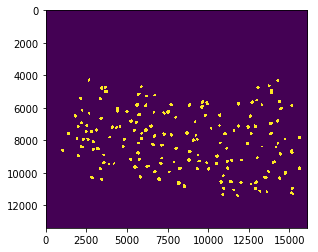

In [82]:
plt.imshow(best)

In [83]:
labeled_best, ncomponents_best = label(best, structure)
print(labeled_best)
print(ncomponents_best)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
162


In [84]:
J_matrix=ground_truth+J_img
L_matrix=ground_truth+L_img
S_matrix=ground_truth+S_img
Y_matrix=ground_truth+Y_img
C_matrix=ground_truth+closing
B_matrix=ground_truth+best

In [95]:
J_iou=np.count_nonzero(J_matrix==2)/np.count_nonzero(J_matrix)
L_iou=np.count_nonzero(L_matrix==2)/np.count_nonzero(L_matrix)
S_iou=np.count_nonzero(S_matrix==2)/np.count_nonzero(S_matrix)
Y_iou=np.count_nonzero(Y_matrix==2)/np.count_nonzero(Y_matrix)
C_iou=np.count_nonzero(C_matrix==2)/np.count_nonzero(C_matrix)
B_iou=np.count_nonzero(B_matrix==2)/np.count_nonzero(B_matrix)
print(J_iou,L_iou,S_iou,Y_iou,C_iou,B_iou)

0.7251993303889284 0.6651489460078949 0.7097739835977998 0.6696686865122605 0.5226467424429212 0.6040044970370881


In [96]:
df=df.append(pd.DataFrame([['four','iou',J_iou,L_iou,S_iou,Y_iou,C_iou,B_iou]], columns=df.columns))
df

,type,metric,Jashjeet,Leah,Sumeet,Yash,Closing,Binary_mask_overlap_0.995
0,four,iou,0.725199,0.665149,0.709774,0.669669,0.522647,0.604004


In [97]:
J_recall=np.count_nonzero(J_matrix==2)/np.count_nonzero(ground_truth)
L_recall=np.count_nonzero(L_matrix==2)/np.count_nonzero(ground_truth)
S_recall=np.count_nonzero(S_matrix==2)/np.count_nonzero(ground_truth)
Y_recall=np.count_nonzero(Y_matrix==2)/np.count_nonzero(ground_truth)
C_recall=np.count_nonzero(C_matrix==2)/np.count_nonzero(ground_truth)
B_recall=np.count_nonzero(B_matrix==2)/np.count_nonzero(ground_truth)
print(J_recall,L_recall,S_recall,Y_recall,C_recall,B_recall)

1.0 1.0 1.0 1.0 0.9484854903622114 0.9592369549319163


In [98]:
df=df.append(pd.DataFrame([['four','recall',J_recall,L_recall,S_recall,Y_recall,C_recall,B_recall]], columns=df.columns))
df

,type,metric,Jashjeet,Leah,Sumeet,Yash,Closing,Binary_mask_overlap_0.995
0,four,iou,0.725199,0.665149,0.709774,0.669669,0.522647,0.604004
0,four,recall,1.000000,1.000000,1.000000,1.000000,0.948485,0.959237


In [99]:
J_precision=np.count_nonzero(J_matrix==2)/np.count_nonzero(J_img)
L_precision=np.count_nonzero(L_matrix==2)/np.count_nonzero(L_img)
S_precision=np.count_nonzero(S_matrix==2)/np.count_nonzero(S_img)
Y_precision=np.count_nonzero(Y_matrix==2)/np.count_nonzero(Y_img)
C_precision=np.count_nonzero(C_matrix==2)/np.count_nonzero(closing)
B_precision=np.count_nonzero(B_matrix==2)/np.count_nonzero(best)
print(J_precision,L_precision,S_precision,Y_precision,C_precision,B_precision)

0.7251993303889284 0.6651489460078949 0.7097739835977998 0.6696686865122605 0.5379161327331649 0.6199160951742035


In [100]:
df=df.append(pd.DataFrame([['four','precision',J_precision,L_precision,S_precision,Y_precision,C_precision,B_precision]], columns=df.columns))
df

,type,metric,Jashjeet,Leah,Sumeet,Yash,Closing,Binary_mask_overlap_0.995
0,four,iou,0.725199,0.665149,0.709774,0.669669,0.522647,0.604004
0,four,recall,1.000000,1.000000,1.000000,1.000000,0.948485,0.959237
0,four,precision,0.725199,0.665149,0.709774,0.669669,0.537916,0.619916


In [101]:
cv2.imwrite('B_matrix_four.jpg',127*B_matrix)

True

In [102]:
B_recall_four_jpg=(B_matrix==2)*127+ground_truth*127
cv2.imwrite('B_recall_four.jpg',B_recall_four_jpg)

True

In [103]:
B_precision_four_jpg=(B_matrix==2)*127+best*127
cv2.imwrite('B_precision_four.jpg',B_precision_four_jpg)

True

In [104]:
best_2=(best>=1)*2

In [105]:
color_matrix=ground_truth+best_2

In [106]:
color_matrix_stack=np.stack((color_matrix,color_matrix,color_matrix),axis=-1)

In [107]:
color_matrix_stack[np.where((color_matrix_stack==[0,0,0]).all(axis=2))] = [255,255,255]#white for background
color_matrix_stack[np.where((color_matrix_stack==[1,1,1]).all(axis=2))] = [255,0,0]#blue for groundtruth
color_matrix_stack[np.where((color_matrix_stack==[2,2,2]).all(axis=2))] = [0,0,255]#red for prediction
color_matrix_stack[np.where((color_matrix_stack==[3,3,3]).all(axis=2))] = [0,255,0]#green for overlap

In [108]:
# plt.imshow(color_matrix_stack)

In [109]:
cv2.imwrite('color_matrix_stack_four.jpg',color_matrix_stack)

True

# Comparison with ground truth of 1

In [110]:
ground_truth_one=one//255

In [111]:
np.unique(ground_truth_one)

array([0, 1], dtype=int32)

In [118]:
J_matrix_one=ground_truth_one+J_img
L_matrix_one=ground_truth_one+L_img
S_matrix_one=ground_truth_one+S_img
Y_matrix_one=ground_truth_one+Y_img
C_matrix_one=ground_truth_one+closing
B_matrix_one=ground_truth_one+best
# print(J_matrix_one,L_matrix_one,S_matrix_one,Y_matrix_one,C_matrix_one,B_matrix_one)

In [119]:
J_iou_one=np.count_nonzero(J_matrix_one==2)/np.count_nonzero(J_matrix_one)
L_iou_one=np.count_nonzero(L_matrix_one==2)/np.count_nonzero(L_matrix_one)
S_iou_one=np.count_nonzero(S_matrix_one==2)/np.count_nonzero(S_matrix_one)
Y_iou_one=np.count_nonzero(Y_matrix_one==2)/np.count_nonzero(Y_matrix_one)
C_iou_one=np.count_nonzero(C_matrix_one==2)/np.count_nonzero(C_matrix_one)
B_iou_one=np.count_nonzero(B_matrix_one==2)/np.count_nonzero(B_matrix_one)
print(J_iou_one,L_iou_one,S_iou_one,Y_iou_one,C_iou_one,B_iou_one)

0.729782567817759 0.795668147243324 0.7456427563437563 0.79029800880687 0.6668798367188896 0.7349983257974707


In [120]:
df=df.append(pd.DataFrame([['one','iou',J_iou_one,L_iou_one,S_iou_one,Y_iou_one,C_iou_one,B_iou_one]], columns=df.columns))
df

,type,metric,Jashjeet,Leah,Sumeet,Yash,Closing,Binary_mask_overlap_0.995
0,four,iou,0.725199,0.665149,0.709774,0.669669,0.522647,0.604004
0,four,recall,1.000000,1.000000,1.000000,1.000000,0.948485,0.959237
0,four,precision,0.725199,0.665149,0.709774,0.669669,0.537916,0.619916
0,one,iou,0.729783,0.795668,0.745643,0.790298,0.666880,0.734998


In [121]:
J_recall_one=np.count_nonzero(J_matrix_one==2)/np.count_nonzero(ground_truth_one)
L_recall_one=np.count_nonzero(L_matrix_one==2)/np.count_nonzero(ground_truth_one)
S_recall_one=np.count_nonzero(S_matrix_one==2)/np.count_nonzero(ground_truth_one)
Y_recall_one=np.count_nonzero(Y_matrix_one==2)/np.count_nonzero(ground_truth_one)
C_recall_one=np.count_nonzero(C_matrix_one==2)/np.count_nonzero(ground_truth_one)
B_recall_one=np.count_nonzero(B_matrix_one==2)/np.count_nonzero(ground_truth_one)
print(J_recall_one,L_recall_one,S_recall_one,Y_recall_one,C_recall_one,B_recall_one)

0.729782567817759 0.795668147243324 0.7456427563437563 0.79029800880687 0.7734216933365213 0.770552022541031


In [122]:
df=df.append(pd.DataFrame([['one','recall',J_recall_one,L_recall_one,S_recall_one,Y_recall_one,C_recall_one,B_recall_one]], columns=df.columns))
df

,type,metric,Jashjeet,Leah,Sumeet,Yash,Closing,Binary_mask_overlap_0.995
0,four,iou,0.725199,0.665149,0.709774,0.669669,0.522647,0.604004
0,four,recall,1.000000,1.000000,1.000000,1.000000,0.948485,0.959237
0,four,precision,0.725199,0.665149,0.709774,0.669669,0.537916,0.619916
0,one,iou,0.729783,0.795668,0.745643,0.790298,0.666880,0.734998
0,one,recall,0.729783,0.795668,0.745643,0.790298,0.773422,0.770552


In [123]:
J_precision_one=np.count_nonzero(J_matrix_one==2)/np.count_nonzero(J_img)
L_precision_one=np.count_nonzero(L_matrix_one==2)/np.count_nonzero(L_img)
S_precision_one=np.count_nonzero(S_matrix_one==2)/np.count_nonzero(S_img)
Y_precision_one=np.count_nonzero(Y_matrix_one==2)/np.count_nonzero(Y_img)
C_precision_one=np.count_nonzero(C_matrix_one==2)/np.count_nonzero(closing)
B_precision_one=np.count_nonzero(B_matrix_one==2)/np.count_nonzero(best)
print(J_precision_one,L_precision_one,S_precision_one,Y_precision_one,C_precision_one,B_precision_one)

1.0 1.0 1.0 1.0 0.8287992463229394 0.9409316900889149


In [124]:
df=df.append(pd.DataFrame([['one','precision',J_precision_one,L_precision_one,S_precision_one,Y_precision_one,C_precision_one,B_precision_one]], columns=df.columns))
df

,type,metric,Jashjeet,Leah,Sumeet,Yash,Closing,Binary_mask_overlap_0.995
0,four,iou,0.725199,0.665149,0.709774,0.669669,0.522647,0.604004
0,four,recall,1.000000,1.000000,1.000000,1.000000,0.948485,0.959237
0,four,precision,0.725199,0.665149,0.709774,0.669669,0.537916,0.619916
0,one,iou,0.729783,0.795668,0.745643,0.790298,0.666880,0.734998
0,one,recall,0.729783,0.795668,0.745643,0.790298,0.773422,0.770552
0,one,precision,1.000000,1.000000,1.000000,1.000000,0.828799,0.940932


In [125]:
cv2.imwrite('B_matrix_one.jpg',127*B_matrix_one)

True

In [126]:
B_recall_one_jpg=(B_matrix_one==2)*127+ground_truth_one*127
cv2.imwrite('B_recall_one.jpg',B_recall_one_jpg)

True

In [127]:
B_precision_one_jpg=(B_matrix_one==2)*127+best*127
cv2.imwrite('B_precision_one.jpg',B_precision_one_jpg)

True

In [128]:
df

,type,metric,Jashjeet,Leah,Sumeet,Yash,Closing,Binary_mask_overlap_0.995
0,four,iou,0.725199,0.665149,0.709774,0.669669,0.522647,0.604004
0,four,recall,1.000000,1.000000,1.000000,1.000000,0.948485,0.959237
0,four,precision,0.725199,0.665149,0.709774,0.669669,0.537916,0.619916
0,one,iou,0.729783,0.795668,0.745643,0.790298,0.666880,0.734998
0,one,recall,0.729783,0.795668,0.745643,0.790298,0.773422,0.770552
0,one,precision,1.000000,1.000000,1.000000,1.000000,0.828799,0.940932


In [129]:
df=df.round(3)
df

,type,metric,Jashjeet,Leah,Sumeet,Yash,Closing,Binary_mask_overlap_0.995
0,four,iou,0.725,0.665,0.710,0.67,0.523,0.604
0,four,recall,1.000,1.000,1.000,1.00,0.948,0.959
0,four,precision,0.725,0.665,0.710,0.67,0.538,0.620
0,one,iou,0.730,0.796,0.746,0.79,0.667,0.735
0,one,recall,0.730,0.796,0.746,0.79,0.773,0.771
0,one,precision,1.000,1.000,1.000,1.00,0.829,0.941


In [132]:
color_matrix_one=ground_truth_one+best_2

In [133]:
color_matrix_stack_one=np.stack((color_matrix_one,color_matrix_one,color_matrix_one),axis=-1)

In [134]:
color_matrix_stack_one[np.where((color_matrix_stack_one==[0,0,0]).all(axis=2))] = [255,255,255]#white for background
color_matrix_stack_one[np.where((color_matrix_stack_one==[1,1,1]).all(axis=2))] = [255,0,0]#blue for groundtruth
color_matrix_stack_one[np.where((color_matrix_stack_one==[2,2,2]).all(axis=2))] = [0,0,255]#red for prediction
color_matrix_stack_one[np.where((color_matrix_stack_one==[3,3,3]).all(axis=2))] = [0,255,0]#green for overlap

In [136]:
cv2.imwrite('color_matrix_stack_one.jpg',color_matrix_stack_one)

True

# Comparison with ground truth of 3

In [137]:
ground_truth_three=three//255

In [138]:
np.unique(ground_truth_three)

array([0, 1], dtype=int32)

In [150]:
J_matrix_three=ground_truth_three+J_img
L_matrix_three=ground_truth_three+L_img
S_matrix_three=ground_truth_three+S_img
Y_matrix_three=ground_truth_three+Y_img
C_matrix_three=ground_truth_three+closing
B_matrix_three=ground_truth_three+best
# print(J_matrix_three,L_matrix_three,S_matrix_three,Y_matrix_three,C_matrix_three,B_matrix_three)

MemoryError: Unable to allocate 1.61 GiB for an array with shape (13390, 16110) and data type float64

In [ ]:
J_iou_three=np.count_nonzero(J_matrix_three==2)/np.count_nonzero(J_matrix_three)
L_iou_three=np.count_nonzero(L_matrix_three==2)/np.count_nonzero(L_matrix_three)
S_iou_three=np.count_nonzero(S_matrix_three==2)/np.count_nonzero(S_matrix_three)
Y_iou_three=np.count_nonzero(Y_matrix_three==2)/np.count_nonzero(Y_matrix_three)
C_iou_three=np.count_nonzero(C_matrix_three==2)/np.count_nonzero(C_matrix_three)
B_iou_three=np.count_nonzero(B_matrix_three==2)/np.count_nonzero(B_matrix_three)
print(J_iou_three,L_iou_three,S_iou_three,Y_iou_three,C_iou_three,B_iou_three)

In [ ]:
df=df.append(pd.DataFrame([['three','iou',J_iou_three,L_iou_three,S_iou_three,Y_iou_three,C_iou_three,B_iou_three]], columns=df.columns))
df

In [ ]:
J_recall_three=np.count_nonzero(J_matrix_three==2)/np.count_nonzero(ground_truth_three)
L_recall_three=np.count_nonzero(L_matrix_three==2)/np.count_nonzero(ground_truth_three)
S_recall_three=np.count_nonzero(S_matrix_three==2)/np.count_nonzero(ground_truth_three)
Y_recall_three=np.count_nonzero(Y_matrix_three==2)/np.count_nonzero(ground_truth_three)
C_recall_three=np.count_nonzero(C_matrix_three==2)/np.count_nonzero(ground_truth_three)
B_recall_three=np.count_nonzero(B_matrix_three==2)/np.count_nonzero(ground_truth_three)
print(J_recall_three,L_recall_three,S_recall_three,Y_recall_three,C_recall_three,B_recall_three)

In [ ]:
df=df.append(pd.DataFrame([['three','recall',J_recall_three,L_recall_three,S_recall_three,Y_recall_three,C_recall_three,B_recall_three]], columns=df.columns))
df

In [ ]:
J_precision_three=np.count_nonzero(J_matrix_three==2)/np.count_nonzero(J_img)
L_precision_three=np.count_nonzero(L_matrix_three==2)/np.count_nonzero(L_img)
S_precision_three=np.count_nonzero(S_matrix_three==2)/np.count_nonzero(S_img)
Y_precision_three=np.count_nonzero(Y_matrix_three==2)/np.count_nonzero(Y_img)
C_precision_three=np.count_nonzero(C_matrix_three==2)/np.count_nonzero(closing)
B_precision_three=np.count_nonzero(B_matrix_three==2)/np.count_nonzero(best)
print(J_precision_three,L_precision_three,S_precision_three,Y_precision_three,C_precision_three,B_precision_three)

In [ ]:
df=df.append(pd.DataFrame([['three','precision',J_precision_three,L_precision_three,S_precision_three,Y_precision_three,C_precision_three,B_precision_three]], columns=df.columns))
df

In [ ]:
cv2.imwrite('B_matrix_three.jpg',127*B_matrix_three)

In [ ]:
B_recall_three_jpg=(B_matrix_three==2)*127+ground_truth_three*127
cv2.imwrite('B_recall_three.jpg',B_recall_three_jpg)

In [ ]:
B_precision_three_jpg=(B_matrix_three==2)*127+best*127
cv2.imwrite('B_precision_three.jpg',B_precision_three_jpg)

In [ ]:
df

In [ ]:
df=df.round(3)
df

In [ ]:
color_matrix_three=ground_truth_three+best_2

In [ ]:
color_matrix_stack_three=np.stack((color_matrix_three,color_matrix_three,color_matrix_three),axis=-1)

In [ ]:
color_matrix_stack_three[np.where((color_matrix_stack_three==[0,0,0]).all(axis=2))] = [255,255,255]#white for background
color_matrix_stack_three[np.where((color_matrix_stack_three==[1,1,1]).all(axis=2))] = [255,0,0]#blue for groundtruth
color_matrix_stack_three[np.where((color_matrix_stack_three==[2,2,2]).all(axis=2))] = [0,0,255]#red for prediction
color_matrix_stack_three[np.where((color_matrix_stack_three==[3,3,3]).all(axis=2))] = [0,255,0]#green for overlap

In [ ]:
cv2.imwrite('color_matrix_stack_three.jpg',color_matrix_stack_three)

# Comparison with ground truth of 2

In [ ]:
ground_truth_two=two//255

In [ ]:
np.unique(ground_truth_two)

In [ ]:
J_matrix_two=ground_truth_two+J_img
L_matrix_two=ground_truth_two+L_img
S_matrix_two=ground_truth_two+S_img
Y_matrix_two=ground_truth_two+Y_img
C_matrix_two=ground_truth_two+closing
B_matrix_two=ground_truth_two+best
# print(J_matrix_two,L_matrix_two,S_matrix_two,Y_matrix_two,C_matrix_two,B_matrix_two)

In [ ]:
J_iou_two=np.count_nonzero(J_matrix_two==2)/np.count_nonzero(J_matrix_two)
L_iou_two=np.count_nonzero(L_matrix_two==2)/np.count_nonzero(L_matrix_two)
S_iou_two=np.count_nonzero(S_matrix_two==2)/np.count_nonzero(S_matrix_two)
Y_iou_two=np.count_nonzero(Y_matrix_two==2)/np.count_nonzero(Y_matrix_two)
C_iou_two=np.count_nonzero(C_matrix_two==2)/np.count_nonzero(C_matrix_two)
B_iou_two=np.count_nonzero(B_matrix_two==2)/np.count_nonzero(B_matrix_two)
print(J_iou_two,L_iou_two,S_iou_two,Y_iou_two,C_iou_two,B_iou_two)

In [ ]:
df=df.append(pd.DataFrame([['two','iou',J_iou_two,L_iou_two,S_iou_two,Y_iou_two,C_iou_two,B_iou_two]], columns=df.columns))
df

In [ ]:
J_recall_two=np.count_nonzero(J_matrix_two==2)/np.count_nonzero(ground_truth_two)
L_recall_two=np.count_nonzero(L_matrix_two==2)/np.count_nonzero(ground_truth_two)
S_recall_two=np.count_nonzero(S_matrix_two==2)/np.count_nonzero(ground_truth_two)
Y_recall_two=np.count_nonzero(Y_matrix_two==2)/np.count_nonzero(ground_truth_two)
C_recall_two=np.count_nonzero(C_matrix_two==2)/np.count_nonzero(ground_truth_two)
B_recall_two=np.count_nonzero(B_matrix_two==2)/np.count_nonzero(ground_truth_two)
print(J_recall_two,L_recall_two,S_recall_two,Y_recall_two,C_recall_two,B_recall_two)

In [ ]:
df=df.append(pd.DataFrame([['two','recall',J_recall_two,L_recall_two,S_recall_two,Y_recall_two,C_recall_two,B_recall_two]], columns=df.columns))
df

In [ ]:
J_precision_two=np.count_nonzero(J_matrix_two==2)/np.count_nonzero(J_img)
L_precision_two=np.count_nonzero(L_matrix_two==2)/np.count_nonzero(L_img)
S_precision_two=np.count_nonzero(S_matrix_two==2)/np.count_nonzero(S_img)
Y_precision_two=np.count_nonzero(Y_matrix_two==2)/np.count_nonzero(Y_img)
C_precision_two=np.count_nonzero(C_matrix_two==2)/np.count_nonzero(closing)
B_precision_two=np.count_nonzero(B_matrix_two==2)/np.count_nonzero(best)
print(J_precision_two,L_precision_two,S_precision_two,Y_precision_two,C_precision_two,B_precision_two)

In [ ]:
df=df.append(pd.DataFrame([['two','precision',J_precision_two,L_precision_two,S_precision_two,Y_precision_two,C_precision_two,B_precision_two]], columns=df.columns))
df

In [ ]:
cv2.imwrite('B_matrix_two.jpg',127*B_matrix_two)

In [ ]:
B_recall_two_jpg=(B_matrix_two==2)*127+ground_truth_two*127
cv2.imwrite('B_recall_two.jpg',B_recall_two_jpg)

In [ ]:
B_precision_two_jpg=(B_matrix_two==2)*127+best*127
cv2.imwrite('B_precision_two.jpg',B_precision_two_jpg)

In [ ]:
df

In [ ]:
df=df.round(3)
df

In [ ]:
df.to_csv('Accuracy metrics.csv')

In [ ]:
color_matrix_two=ground_truth_two+best_2

In [ ]:
color_matrix_stack_two=np.stack((color_matrix_two,color_matrix_two,color_matrix_two),axis=-1)

In [ ]:
color_matrix_stack_two[np.where((color_matrix_stack_two==[0,0,0]).all(axis=2))] = [255,255,255]#white for background
color_matrix_stack_two[np.where((color_matrix_stack_two==[1,1,1]).all(axis=2))] = [255,0,0]#blue for groundtruth
color_matrix_stack_two[np.where((color_matrix_stack_two==[2,2,2]).all(axis=2))] = [0,0,255]#red for prediction
color_matrix_stack_two[np.where((color_matrix_stack_two==[3,3,3]).all(axis=2))] = [0,255,0]#green for overlap

In [ ]:
cv2.imwrite('color_matrix_stack_two.jpg',color_matrix_stack_two)